This project considers the SEIR model with three control inputs $u_1$ (social distancing), $u_2$ (vaccination) and $u_3$ (treatment). The model also includes the natural mortality rate ($\mu $).  

Model Equations


\begin{align*}
\frac{dS}{dt} &= \mu N - \beta (1-u_1)\frac{SI}{N} - u_2 S - \mu S, \\
\frac{dE}{dt} &= \beta (1-u_1)\frac{SI}{N} - \sigma E - \mu E, \\
\frac{dI}{dt} &= \sigma E - (\gamma + u_3) I - \mu I, \\
\frac{dR}{dt} &= (\gamma + u_3) I + u_2 S - \mu R.
\end{align*}

$\beta$: Base transmission rate. \
$\sigma$: Rate at which the individual in the exposed compartment moves to the infectious compartment. \
$\gamma$: Rate at which the individual in the infectious compartment moves to the recovered compartment. \
$\mu$: Natural birth and  death rate.

**Control Affine form**

$$
\frac{d}{dt}
\begin{bmatrix}
\bbox[lightpink]{S} \\[0.3em]
\bbox[lightpink]{E} \\[0.3em]
\bbox[lightpink]{I} \\[0.3em]
\bbox[lightpink]{R}
\end{bmatrix} =
\underbrace{
\begin{bmatrix}
\bbox[lightblue]{\mu} \bbox[lightblue]{N} - \bbox[lightblue]{\beta} \frac{\bbox[lightpink]{SI}}{\bbox[lightblue]{N}} - \bbox[lightblue]{\mu} \bbox[lightpink]{S} \\[0.3em]
\bbox[lightblue]{\beta} \frac{\bbox[lightpink]{SI}}{\bbox[lightblue]{N}} - \bbox[lightblue]{\sigma} \bbox[lightpink]{E} - \bbox[lightblue]{\mu} \bbox[lightpink]{E} \\[0.3em]
\bbox[lightblue]{\sigma} \bbox[lightpink]{E} - \bbox[lightblue]{\gamma} \bbox[lightpink]{I} - \bbox[lightblue]{\mu} \bbox[lightpink]{I} \\[0.3em]
\bbox[lightblue]{\gamma} \bbox[lightpink]{I} - \bbox[lightblue]{\mu} \bbox[lightpink]{R}
\end{bmatrix}}_{f_0(X)} +
\underbrace{
\begin{bmatrix}
\bbox[lightblue]{\beta} \frac{ \bbox[lightpink]{SI}}{\bbox[lightblue]{N}} \\[1em]
-\bbox[lightblue]{\beta} \frac{\bbox[lightpink]{S I}}{\bbox[lightblue]{N}} \\[0.9em]
0 \\[0.4em]
0
\end{bmatrix}}_{f_1(X)} \bbox[lightgreen]{u_1} +
\underbrace{
\begin{bmatrix}
-\bbox[lightpink]{S} \\[0.9em]
0 \\[0.9em]
0 \\[0.9em]
\bbox[lightpink]{S}
\end{bmatrix}}_{f_2(X)} \bbox[lightgreen]{u_2} +
\underbrace{
\begin{bmatrix}
0 \\[0.8em]
0 \\[0.8em]
-\bbox[lightpink]{I} \\[0.8em]
\bbox[lightpink]{I}
\end{bmatrix}}_{f_3(X)} \bbox[lightgreen]{u_3}
$$

Flow Chart of the model


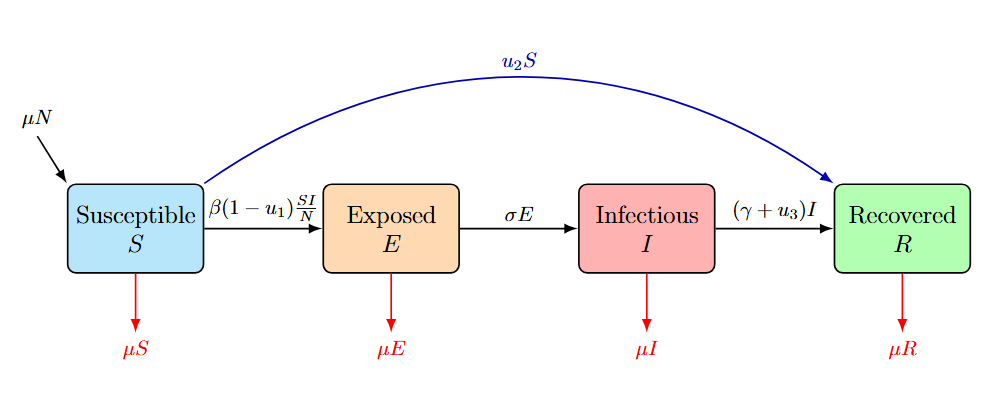

The initail conditions used are:
N = 100,000

$S_0$ = 99,000

$E_0$ = 10,000

$I_0$ = 0

$R_0$ = 0


The controls used are:

$\gamma = \frac{1}{10}$ (Recovery rate)

$\beta = 0.5$ (average number of contacts per person in a day)

$\sigma = \frac{1}{5}$ (incubation rate)

$\mu  = \frac{1}{70 \times 365}$


In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define model parameters
mu = 1/(70*365)
beta = 0.5
sigma = 1/5
gamma = 1/10
N = 1e5


Control intenventions were start at $t = 30$ days for $u_1$ and $u_3$ and $t = 60$ days for $u_2$

In [9]:
u_1 = u_3 = 30
u_2 = 60
# Define control functions
def u1(t):
    return 0.6 if t >=  u_1 else 0.0

def u2(t):
    return 0.005 if t >= u_2 else 0.0

def u3(t):
    return 0.1 if t >= u_3 else 0.0

Defining the function for the model

In [10]:

def seir_model(t, y):
    S, E, I, R = y
    dSdt = mu*N - beta*(1 - u1(t))*(S*I)/N - u2(t)*S - mu*S
    dEdt = beta*(1 - u1(t))*(S*I)/N - sigma*E - mu*E
    dIdt = sigma*E - (gamma + u3(t)) * I - mu*I
    dRdt = (gamma + u3(t)) * I + u2(t)*S - mu*R
    return [dSdt, dEdt, dIdt, dRdt]

**Initial conditions**

In [11]:
S0=99000
E0 =1000
I0 = 0
R0 = 0

#cretaing a list for the initial conditions
initial_conditions = [S0, E0, I0, R0]

t_span = [0, 200]

#Creating a lis for the number of days
t_eval = np.linspace(0, 200, 201)

**Solving the model equations using the Runge-Kutta-Fehlberg method**

In [12]:
sol = solve_ivp(seir_model, t_span, initial_conditions, t_eval = t_eval, method='RK45')
t = sol.t
S, E, I, R = sol.y


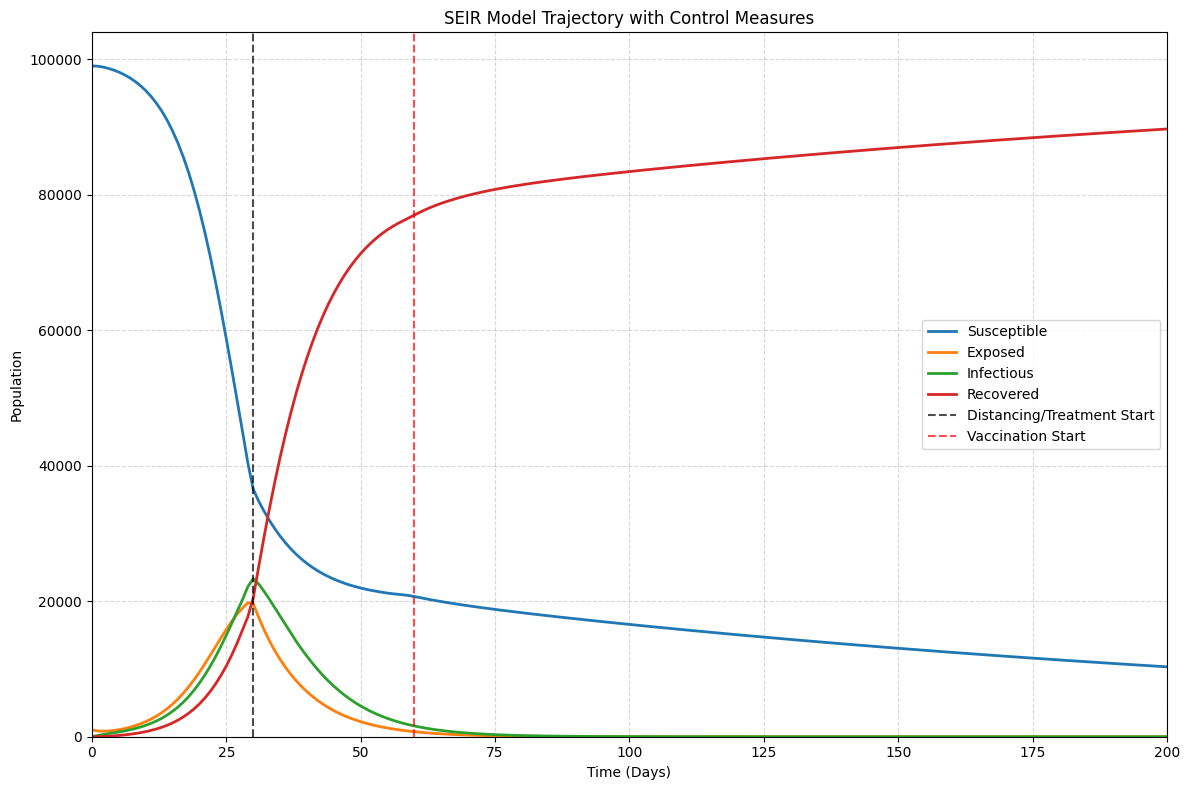

In [13]:
plt.figure(figsize=(12, 8))

plt.plot(t, S, label='Susceptible', linewidth=2)
plt.plot(t, E, label='Exposed', linewidth=2)
plt.plot(t, I, label='Infectious', linewidth=2)
plt.plot(t, R, label='Recovered', linewidth=2)

plt.axvline(x=u_1, color='k', linestyle='--', alpha=0.7, label='Distancing/Treatment Start')
plt.axvline(x= u_2, color='r', linestyle='--', alpha=0.7, label='Vaccination Start')

plt.title('SEIR Model Trajectory with Control Measures')
plt.xlabel('Time (Days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlim(0, 200)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

**Calculating daily new cases, that is the numebr of individuals moving from the exposed compartment to the infected compartment**

In [14]:
true_daily_cases = sigma * E

**Adding different levels of Guassian noise with mean of zero and standard deviation of one.**

In [15]:
np.random.seed(10) # For reproducibility
noise_10_pct = 0.1 * true_daily_cases * np.random.randn(len(true_daily_cases))
noisy_cases_10_pct = true_daily_cases + noise_10_pct
noisy_cases_10_pct = np.clip(noisy_cases_10_pct, 0, None) # Prevent negative cases

noise_30_pct = 0.3 * true_daily_cases * np.random.randn(len(true_daily_cases))
noisy_cases_30_pct = true_daily_cases + noise_30_pct
noisy_cases_30_pct = np.clip(noisy_cases_30_pct, 0, None) # Prevent negative cases

**Ploting the nioses and the true measurements.**

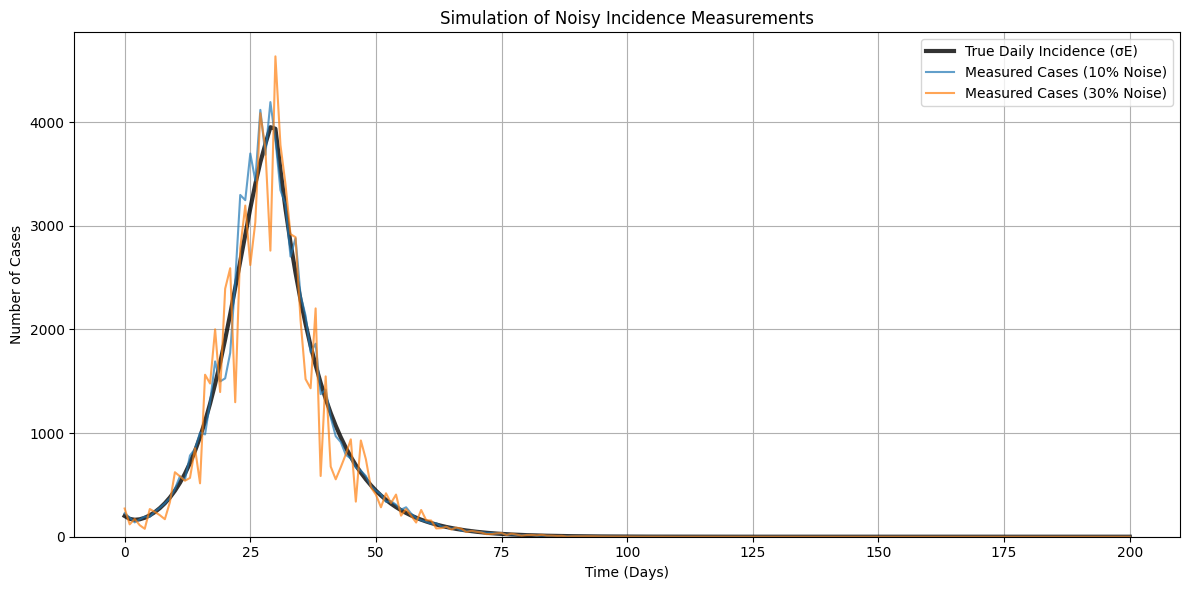

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(t, true_daily_cases, label='True Daily Incidence (σE)', color='black', linewidth=3, alpha=0.8)
plt.plot(t, noisy_cases_10_pct, label='Measured Cases (10% Noise)', alpha=0.7)
plt.plot(t, noisy_cases_30_pct, label='Measured Cases (30% Noise)', alpha=0.7)

plt.title('Simulation of Noisy Incidence Measurements')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()